# ①研修効果の測定

In [1]:
#長期インターンで行ったアンケート分析を実施した際のコード
#秘密保持のため、項目名は〇〇で隠している

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# SudachiPy使用
from sudachipy import tokenizer
from sudachipy import dictionary
df_pre=pd.read_excel('〇〇.xlsx',sheet_name="〇〇")
df_pre

FileNotFoundError: [Errno 2] No such file or directory: '〇〇.xlsx'

In [ ]:
df_post=pd.read_excel('〇〇.xlsx',sheet_name="〇〇").dropna(thresh=5)
df_post

In [ ]:
df_merge=pd.merge(df_pre,df_post,on="〇〇",how="outer",indicator=True)
df_merge

In [ ]:
df_merge_both=df_merge[df_merge["_merge"]=="both"].drop(["〇〇","〇〇","〇〇","〇〇","〇〇"],axis=1)

In [ ]:
df_merge_both=df_merge_both.rename(columns={"〇〇":"〇〇"})
df_merge_both=df_merge_both.rename(columns={"〇〇":"〇〇"})
df_merge_both=df_merge_both.rename(columns={"〇〇":"〇〇"})
df_merge_both

In [ ]:
df_merge_both2=df_merge_both[["〇〇","〇〇","〇〇","〇〇","〇〇","〇〇"]].dropna()
df_merge_both2

# 対応ありT検定

In [ ]:
#研修前と研修後の問１〜問３
from scipy import stats
stats.ttest_rel(df_merge_both2["〇〇"],df_merge_both2["〇〇"])

In [ ]:
stats.ttest_rel(df_merge_both2["〇〇"],df_merge_both2["〇〇"])

In [ ]:
stats.ttest_rel(df_merge_both2["〇〇"],df_merge_both2["〇〇"])

# 対応なしT検定

In [ ]:
#正規性はある程度確認済みなので、student or welch

In [ ]:
# F検定で分散の違いを見てから検定の種類を判断
# 対面とオンライン
stats.bartlett(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"])
# p値が0.07であることから、有意水準の設定方法によってはウェルチを使用するべき

In [ ]:
# ステューデント
stats.ttest_ind(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"])

In [2]:
# ウェルチ
stats.ttest_ind(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"],equal_var=False)

NameError: name 'stats' is not defined

In [3]:
#完成版
list1=["〇〇","〇〇"]
list2=["〇〇","〇〇","〇〇","〇〇","〇〇"]
for i in list1:
    for j in list2:
        print(stats.bartlett(df_merge_both[df_merge_both[i]==1][j],df_merge_both[df_merge_both[i]==0][j]))
        print(stats.ttest_ind(df_merge_both[df_merge_both[i]==1][j],df_merge_both[df_merge_both[i]==0][j]))

NameError: name 'stats' is not defined

In [4]:
print(stats.ttest_ind(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"]))
print(stats.ttest_ind(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"]))
print(stats.ttest_ind(df_merge_both[df_merge_both["〇〇"]==1]["〇〇"],df_merge_both[df_merge_both["〇〇"]==0]["〇〇"],equal_var=False))

NameError: name 'stats' is not defined

In [5]:
#完成版
list1=["〇〇","〇〇"]
list2=["〇〇","〇〇","〇〇","〇〇","〇〇"]
result_stats=pd.DataFrame(columns=[list2])
for i in list1:
    for j in list2:
        print(stats.ttest_ind(df_merge_both[df_merge_both[i]==1][j],df_merge_both[df_merge_both[i]==0][j]))

NameError: name 'stats' is not defined

In [6]:
Thoughts=df_post.loc[:,"〇〇"].dropna().reset_index(drop=True)
Thoughts.to_excel("〇〇.xlsx")

NameError: name 'df_post' is not defined

# ②自由回答項目の分析

In [7]:
data = pd.read_excel("〇〇.xlsx")
input_text_data = data['〇〇']

FileNotFoundError: [Errno 2] No such file or directory: '〇〇.xlsx'

In [8]:
input_text_data=input_text_data.replace("\n","")
input_text_data

NameError: name 'input_text_data' is not defined

In [9]:
TARGET_POS = ["名詞","形容詞"]
stop_words_dict = "stop_words_dictionary.csv"
stop_words_dict = pd.read_csv(stop_words_dict, sep="\t", header=None)
STOP_WORDS = [i for i in stop_words_dict[0]]
fpath = "Arial Unicode.ttf"
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C

# ワードクラウド作成

In [10]:
def create_add_info_morph_list(input_text_data):
    input_text_list = [i for i in input_text_data]
    morph_list = []
    add_info_morph_list = []
    for sentence in input_text_list:
        base = [m.dictionary_form() for m in tokenizer_obj.tokenize(sentence, mode)]
        norm = [m.normalized_form() for m in tokenizer_obj.tokenize(sentence, mode)]
        pos = [m.part_of_speech()[0] for m in tokenizer_obj.tokenize(sentence, mode)]
        pos1 = [m.part_of_speech()[1] for m in tokenizer_obj.tokenize(sentence, mode)]
        for b, n, p, p1 in zip(base, norm, pos, pos1):
            morph = {'base':b, 'norm':n, 'pos':p, 'pos1':p1}
            if morph['pos'] == '名詞' and morph['pos1'] == '固有名詞':
                morph['base'] = morph['norm']           
            if morph['pos'] in TARGET_POS and \
            morph['base'] not in STOP_WORDS:
                morph_list.append(morph)
                
        add_info_morph_list.append(morph_list)
        morph_list = []
        
    return add_info_morph_list

In [11]:
add_info_morph_list = create_add_info_morph_list(input_text_data)
add_info_morph_list

NameError: name 'input_text_data' is not defined

In [12]:
word_list = []
words_list = []

for sentence in add_info_morph_list:
    for i in range(0, len(sentence)):
        word = sentence[i]['base']
        word_list.append(word)
    words_list.append(word_list)
    word_list = []

NameError: name 'add_info_morph_list' is not defined

In [13]:
wc_list = []

for word in words_list:
    for w in word:
        wc_list.append(w)
        wc_str = " ".join(wc_list)
type(wc_str)

NameError: name 'wc_str' is not defined

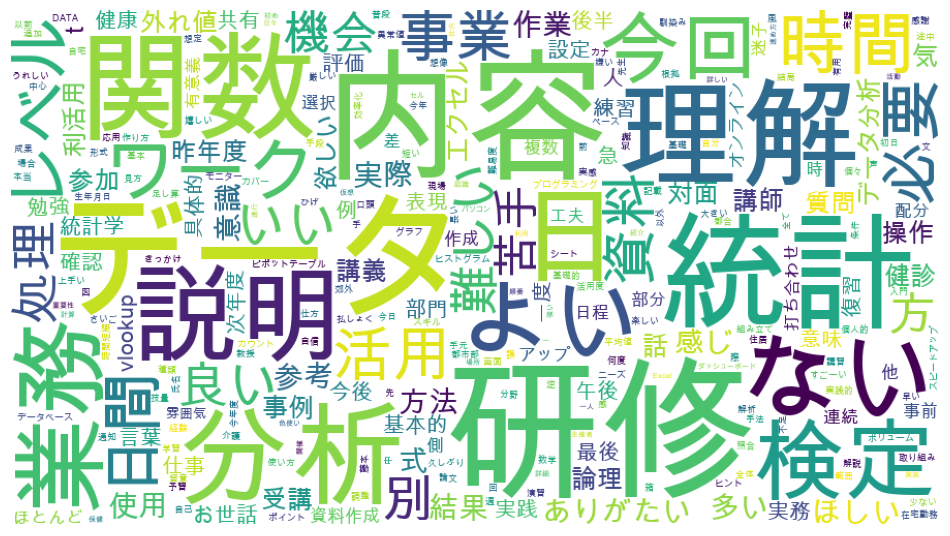

In [25]:
#結果はgithubにアップロード
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=500, 
    background_color="white",
    max_words=500, 
    max_font_size=150, 
    min_font_size=4, 
    collocations = False
).generate(wc_str)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()